In [2]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]


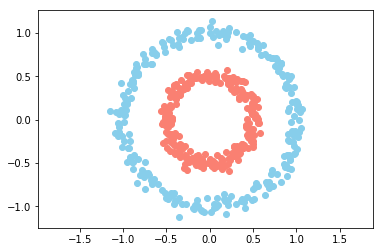

In [13]:
# crear dataset
n = 500 # numero de registros
p = 2 # caracteristicas de cada registro. P ej: 500 personas de las que sabemos nombre y altura

X,Y = make_circles(n_samples=n,factor=0.5, noise=0.05) # x=entrada, y=salida

Y = Y[:,np.newaxis] # le añadimos una dimension para que sea (500,1)

#print(Y) #es un binario que dice si pertenece a alguna de las clases: 0 para un circulo, 1 para el otro
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c="salmon")
plt.axis("equal")
plt.show()

In [14]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        # numero de conexiones de la capa anterior
        # numero de neuronas
        # funcion de activacion
        self.act_f = act_f

        self.b = np.random.rand(1,n_neur)*2-1 # numero de bias (?) lo queremos de -1 a 1
        self.W = np.random.rand(n_conn,n_neur)*2-1 # matriz de pesos

In [15]:
# Funcion de activacion
sigm = (lambda x: 1/(1+np.e ** (-x)),
        lambda x: x*(1-x))

relu = lambda x: np.maximum(0,x)

# mostrar sigmoide
#_x = np.linspace(-5,5,100)
#plt.plot(_x,sigm[0](_x))

In [25]:
# Creamos red capa por capa
layer0 = neural_layer(p,4,sigm)
layer1 = neural_layer(4,8,sigm)
# ...

# pero es mas comodo hacer una funcion que defina todas

def create_nn(topology, act_f):

    nn = [] # vector contenedor de las capas de la red

    for l_index,layer in enumerate(topology[:-1]): #descarta el ultimo valor para q no desborde
        nn.append(neural_layer(topology[l_index],topology[l_index+1],act_f))
    
    return nn


# Hiperparametro
topology = [p,4,8,1] # define neuronas para cada capa de la red


# crear la red
neural_net = create_nn(topology,sigm)


In [ ]:
# funcion de coste
l2_cost = ( lambda Ypredicted, Yreal: np.mean((Ypredicted-Yreal)**2), #RMSE
            lambda Ypredicted, Yreal: (Ypredicted-Yreal))

def train(neural_net, X, Y, l2_cost, learning_rate=0.5, train=True):
    
    out = [(None, X)] # vector de pares de z,a de cada capa

    # forward pass
    for l_index,layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l_index].W + neural_net[l_index].b # suma ponderada = entrada por los pesos de la capa (multiplicacion matricial) 
        a = neural_net[l_index].act_f[0](z) # Salida capa
        
        out.append((z,a))

    #print(out[-1][-1])
    #print("Error: ")
    #print(l2_cost[0](out[-1][-1], Y))
    # hasta aqui la red no está entrenada

    if train:
        # backward pass + gradient descent = training
        # backward pass
        deltas = []
        for l_index in reversed(range(0,len(neural_net))):
            
            z = out[l_index+1][0]
            a = out[l_index+1][1]

            #print (a.shape)
            
            # NOTA  .T es para el traspuesto 

            if l_index == len(neural_net)-1:
                # delta ultima capa
                delta0 = l2_cost[1](a,Y) * neural_net[l_index].act_f[1](a)
                # derivada de la funcion de coste para la salida de la ultima capa (a) y el vector con los valores de salida Y
                # por la derivada de la funcion de activacion de la ultima capa
                #print("Delta 0: ")
                #print (delta0.shape)
                deltas.insert(0,delta0)
            else:
                # delta capa previa
                deltai = deltas[0] @ _W.T * neural_net[l_index].act_f[1](a)
                # delta calculada en la capa anterior multiplicado matricialmente por el vector de pesos W de la capa siguiente
                deltas.insert(0,deltai)
                
            # se guarda la variable W que se usara para el gradient descent 
            _W = neural_net[l_index].W

            # Gradient Descent
            neural_net[l_index].b = neural_net[l_index].b - np.mean(deltas[0], axis=0, keepdims=True) * learning_rate
            #print("Gradient descent: ")
            #print(out[l_index][1].T.shape,deltas[0].shape)
            neural_net[l_index].W = neural_net[l_index].W - out[l_index][1].T @ deltas[0] * learning_rate

    return out[-1][1]

train(neural_net,X,Y,l2_cost,0.5)
print("")


[[9.95067933e-01]
 [7.69249540e-03]
 [9.92110928e-01]
 [2.28134797e-02]
 [9.90812783e-01]
 [1.94282526e-02]
 [9.98916185e-01]
 [9.96754760e-01]
 [9.96787216e-01]
 [2.57866964e-02]
 [2.67744662e-03]
 [9.95318582e-01]
 [9.56592705e-01]
 [9.82689666e-01]
 [2.11910209e-02]
 [4.66989912e-03]
 [9.87824392e-01]
 [9.97871459e-01]
 [1.11597616e-02]
 [9.95628025e-01]
 [8.16687608e-03]
 [9.99165334e-01]
 [9.98782253e-01]
 [9.97795420e-01]
 [9.94636108e-01]
 [4.69668535e-03]
 [9.98376147e-01]
 [2.87598992e-02]
 [9.97173968e-01]
 [2.13290800e-02]
 [1.42643649e-02]
 [1.95031671e-03]
 [9.94420988e-01]
 [9.93592475e-01]
 [3.62690043e-02]
 [7.97680558e-03]
 [9.71504876e-01]
 [5.17971679e-03]
 [5.19898802e-02]
 [3.40884224e-02]
 [5.80636988e-03]
 [1.25146425e-02]
 [6.06291690e-03]
 [9.91052676e-01]
 [9.87114853e-01]
 [8.55318285e-03]
 [9.91141618e-01]
 [9.96117760e-01]
 [7.86459750e-03]
 [9.97056111e-01]
 [9.91796661e-01]
 [9.95609146e-01]
 [1.42841521e-02]
 [9.69305618e-01]
 [9.99084321e-01]
 [1.392146

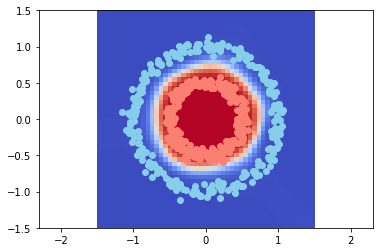

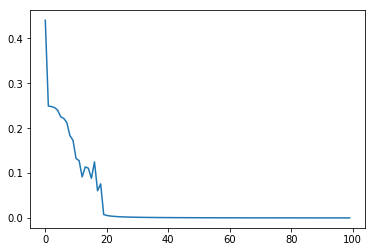

In [31]:
## Programita de prueba para comprobar la calidad de la red
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm) # red neuronal nueva

loss = [] # vector vacio para guardar los costes (perdidas)

for i in range(2500):   # iterar sobre train
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, learning_rate=0.05)
  
  if i % 25 == 0: #cada 25 iteraciones calcular el coste y añadirlo
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50 #malla de 50x50 y en cada punto se hace una prediccion

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm") # visualizar en rojo y azul la clasificacion de la red
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  